# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

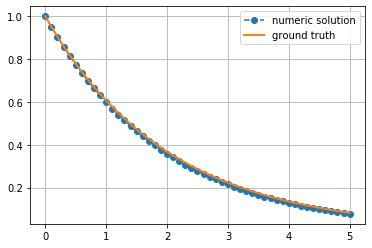

In [9]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

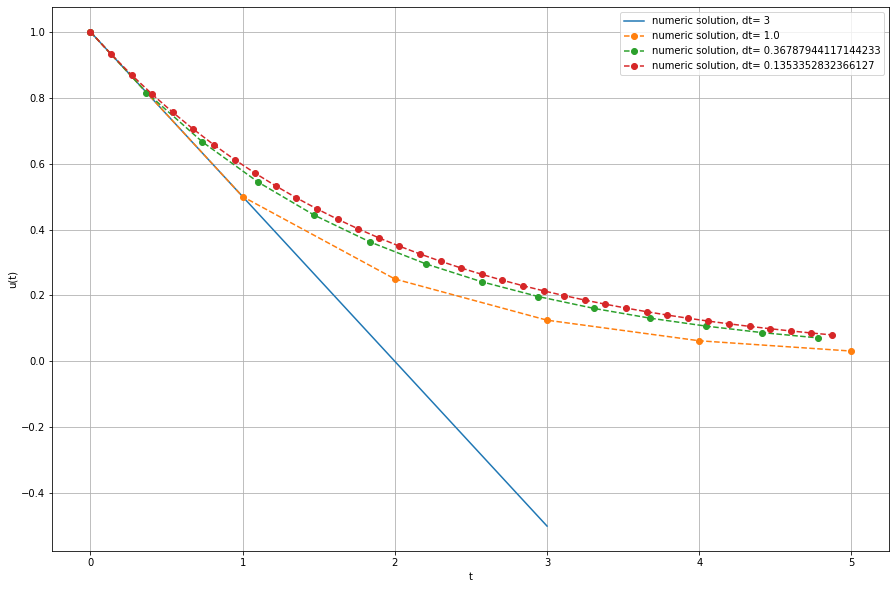

In [10]:
i = 0 
plt.figure(figsize=(15,10)) 
tt1,y1 = euler_solve(lam, u0=1.0, T=5, dt=3)
plt.plot(tt1,y1, '-', label='numeric solution, dt= ' + str(3))
for k in range(0,3):
    tt1,y1 = euler_solve(lam, u0=1.0, T=5, dt=np.e**(-k))
    plt.plot(tt1,y1, 'o--', label='numeric solution, dt= ' + str(np.e**(-k))) 
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.grid()    


    


### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

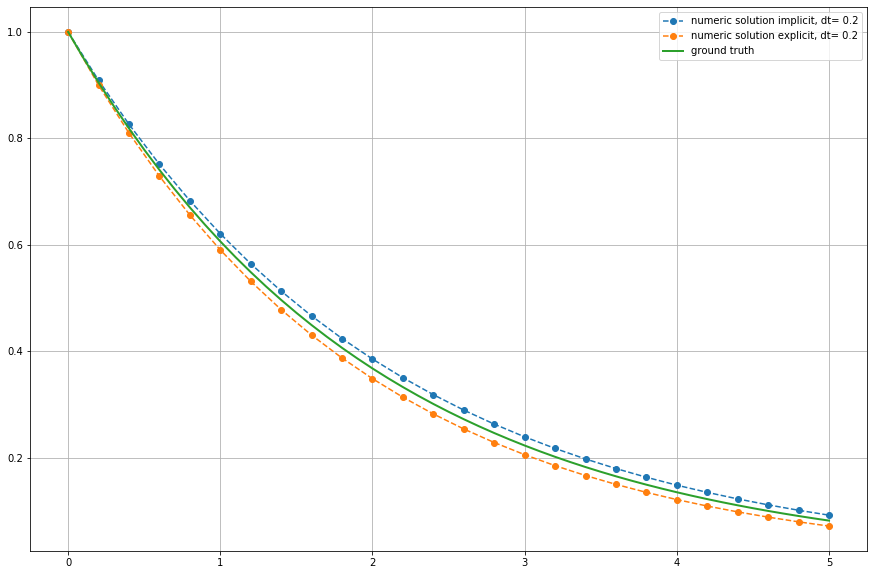

In [11]:
def euler_solve_new(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1-lam * dt)
    return tt, y
lam = -0.5
tt_im, y_im = euler_solve_new(lam, u0=1.0, T=5, dt=0.2)
tt_ex, y_ex = euler_solve(lam, u0=1.0, T=5, dt=0.2)
plt.figure(figsize=(15,10)) 
plt.plot(tt_im, y_im, 'o--', label='numeric solution implicit, dt= ' + str(0.2))
plt.plot(tt_ex, y_ex, 'o--', label='numeric solution explicit, dt= ' + str(0.2))
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

#### We see that implicit is the upper limit, explicit is lower limit.

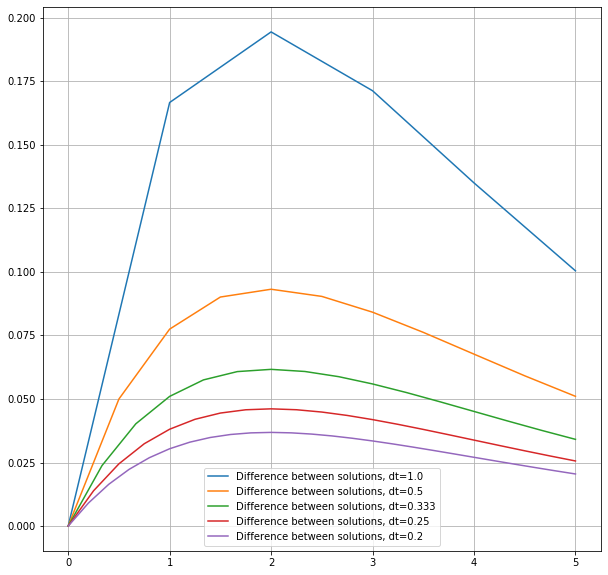

In [23]:
plt.figure(figsize=(10,10)) 
for i in range(0,5):
    tt_im1, y_im1 = euler_solve_new(lam, u0=1.0, T=5, dt=1/(i+1))
    tt_ex1, y_ex1 = euler_solve(lam, u0=1.0, T=5, dt=1/(i+1))
    plt.plot(tt_ex1,abs(y_ex1-y_im1), label='Difference between solutions, dt='+ str(round(1/(i+1),3)))
plt.legend()
plt.grid()

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [27]:
def euler_solve_gen(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros([len(u0),num_steps+1])
    y[:,0] = u0
    for k in range(num_steps):
        y[:,k+1] = y[:,k] + dt*(A@y)[:,k]
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [41]:
A = np.array([[-10,10],[32, 499]])
u1 = np.array([0,1])
tyt1, sol1 = euler_solve_gen(A,u1,T=5,dt=0.01)
print(sol1)

[[ 0.      0.1     0.689  ...     nan     nan     nan]
 [ 1.      5.99   35.9121 ...     nan     nan     nan]]


#### Our algorithm diverges on this matrix.

In [42]:
eigen = np.linalg.eigvals(A)
s = np.max(np.abs(eigen))/np.min(np.abs(eigen))
print(s)

47.010931741663796


#### We can consider that our system is stiff.

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [43]:
def euler_solve_gen_new(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros([len(u0),num_steps+1])
    y[:,0] = u0
    for k in range(num_steps):
        y[:,k+1] = np.linalg.solve((1*np.eye(len(u0))-dt*A),y[:,k])
    return tt, y

In [52]:
tyt2, sol2 = euler_solve_gen_new(A,u1,T=5,dt=0.01)
print(sol2)
print('Second solution norm: ',np.linalg.norm(sol2))
print('First solution norm: ',np.linalg.norm(sol1))

[[ 0.00000000e+00 -2.26193169e-02 -1.47862081e-02 ... -2.80278227e-24
  -2.53352187e-24 -2.29012904e-24]
 [ 1.00000000e+00 -2.48812486e-01  6.35448803e-02 ...  1.75989248e-25
   1.59082143e-25  1.43799286e-25]]
Second solution norm:  1.0334753590174837
First solution norm:  nan


# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

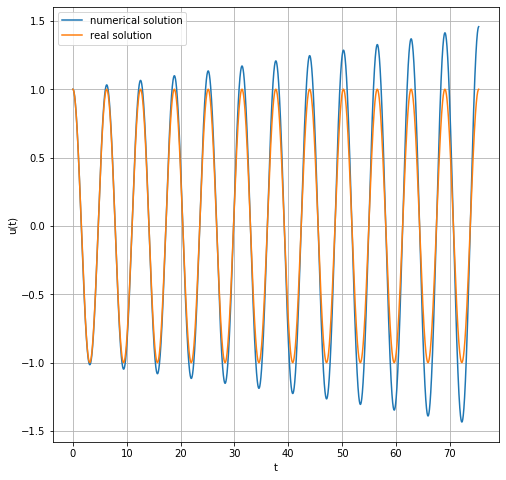

In [187]:
def RealSolution(t,x0,w):
    A=-x0[0]*w
    B=x0[1]
    x=-A/w*np.cos(w*t)+B/w*np.sin(w*t)
    p=A*np.sin(w*t)+B*np.cos(w*t)
    return x,p
w = 1
S = np.array([[0,1],[-w**2,0]])
u3 = np.array([1,0])
tre, sol_osc = euler_solve_gen(S,u3, 24*np.pi/w, dt=0.01) 
plt.figure(figsize=(8,8)) 
plt.plot(tre,sol_osc[0,:],label = 'numerical solution')
plt.plot(tre,RealSolution(tre,u3,w)[0], label = 'real solution')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.grid()

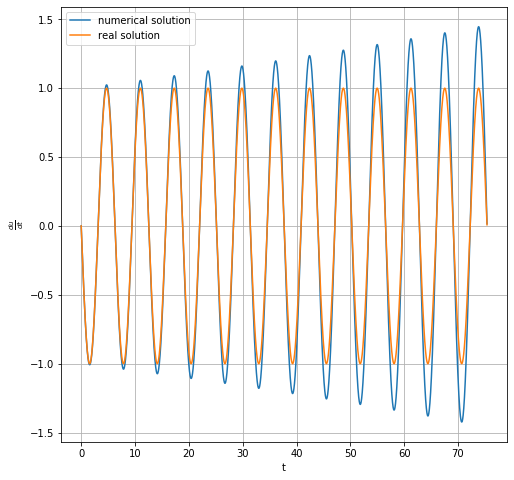

In [188]:
plt.figure(figsize=(8,8)) 
plt.plot(tre,sol_osc[1,:],label = 'numerical solution')
plt.plot(tre,RealSolution(tre,u3,w)[1], label = 'real solution')
plt.xlabel('t')
plt.ylabel('$\\frac{du}{dt}$')
plt.legend()
plt.grid()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


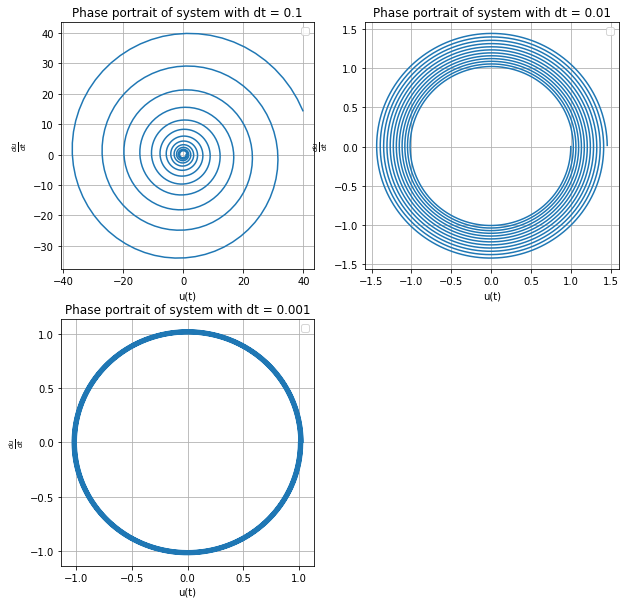

In [189]:
plt.figure(figsize = (10,10))
for m in range(1,4):
    plt.subplot(2, 2, m)
    trem, oscil_m = euler_solve_gen(S,u3, 24*np.pi/w, dt=10**(-m))
    plt.plot(oscil_m[0,:]*w,oscil_m[1,:])
    plt.xlabel('u(t)')
    plt.ylabel('$\\frac{du}{dt}$')
    plt.title('Phase portrait of system with dt = '+ str(10**(-m)))
    plt.legend()
    plt.grid()

#### How we can see energy of system doesn't conserve.

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [190]:
def runge_kutt_2(A,u0,T,dt):
    num_steps = int(2*T/dt)
    tt = np.arange(num_steps/2)*dt
    y = np.zeros([len(u0),num_steps+1])
    y[:,0] = u0
    for k in range(num_steps-1):
        y[:,k+1] = y[:,k] + dt/2*(A@y)[:,k]
        y[:,k+2] = y[:,k] + dt/2*(A@y)[:,k+1]
    y = y[:,::2]
    return tt, y   

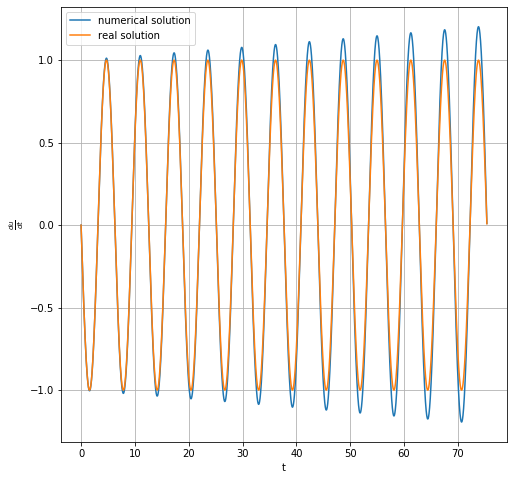

In [191]:
trk2, sol_osc_rk2 = runge_kutt_2(S,u3, 24*np.pi/w, dt=0.01) 
plt.figure(figsize=(8,8)) 
plt.plot(trk2,sol_osc_rk2[1,:],label = 'numerical solution')
plt.plot(trk2,RealSolution(trk2,u3,w)[1], label = 'real solution')
plt.xlabel('t')
plt.ylabel('$\\frac{du}{dt}$')
plt.legend()
plt.grid()

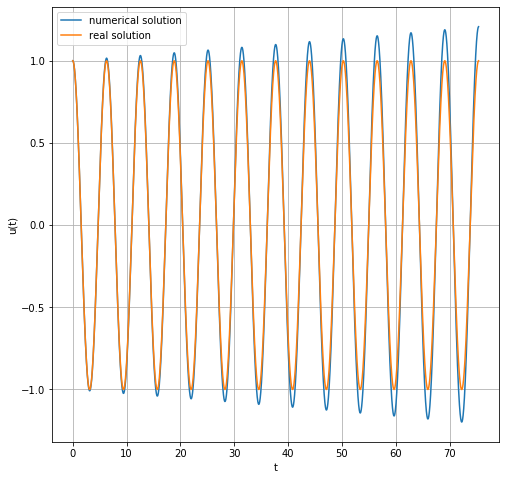

In [192]:
plt.figure(figsize=(8,8)) 
plt.plot(trk2,sol_osc_rk2[0,:],label = 'numerical solution')
plt.plot(trk2,RealSolution(trk2,u3,w)[0], label = 'real solution')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.grid()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


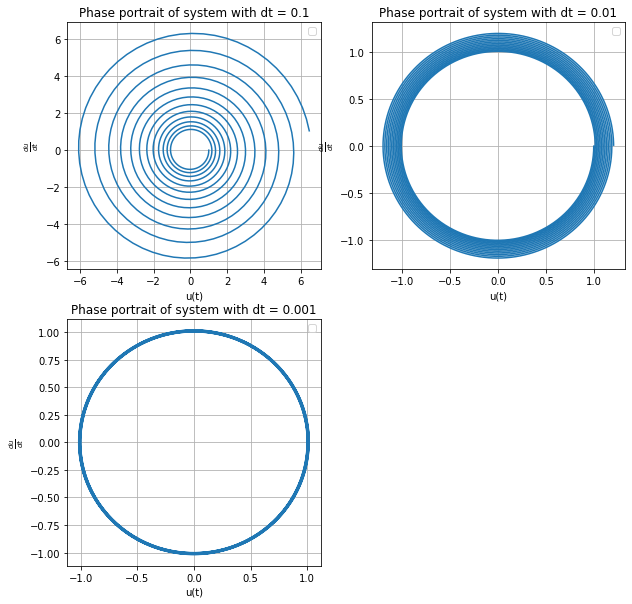

In [193]:
plt.figure(figsize = (10,10))
for m in range(1,4):
    plt.subplot(2, 2, m)
    trem, oscil_rk2_m = runge_kutt_2(S,u3, 24*np.pi/w, dt=10**(-m))
    plt.plot(oscil_rk2_m[0,:]*w,oscil_rk2_m[1,:])
    plt.xlabel('u(t)')
    plt.ylabel('$\\frac{du}{dt}$')
    plt.title('Phase portrait of system with dt = '+ str(10**(-m)))
    plt.legend()
    plt.grid()

#### We can see that Runge-Kutta 2 schema's conserving of energy is much better than Eiler's schema.

In [195]:
def runge_kutt_4(A,u0,T,dt):
    num_steps = int(2*T/dt)
    tt = np.arange(num_steps/2)*dt
    y = np.zeros([len(u0),num_steps+1])
    k1
    k2
    k3
    k4
    y[:,0] = u0
    for k in range(num_steps-1):
        k1[:,k] = (A@y)[:,k]
        k2[:,k] = (A@y)[:,k] + (A@k1)[:,k]*dt/2
        k3[:,k] = (A@y)[:,k] + (A@k2)[:,k]*dt/2
        k4[:,k] = (A@y)[:,k] + (A@k3)[:,k]*dt
        y[:,k+2] = y[:,k] + dt/6*(k1[:,k]+2*k2[:,k]+k3[:,k]+k4[:,k])
    y = y[:,::2]
    return tt, y   

In [196]:
trk4, sol_osc_rk4 = runge_kutt_4(S,u3, 24*np.pi/w, dt=0.01) 
plt.figure(figsize=(8,8)) 
plt.plot(trk4,sol_osc_rk4[1,:],label = 'numerical solution')
plt.plot(trk4,RealSolution(trk4,u3,w)[1], label = 'real solution')
plt.xlabel('t')
plt.ylabel('$\\frac{du}{dt}$')
plt.legend()
plt.grid()

NameError: name 'k1' is not defined